In [4]:
import pandas as pd
import numpy as np

import dateutil.easter as easter

import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, FormatStrFormatter, PercentFormatter

from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

## Read data

In [12]:
train_df = pd.read_csv("data/train.csv", parse_dates=True, index_col=["date"])
test_df = pd.read_csv("data/test.csv", parse_dates=True, index_col=["date"])

display(train_df, test_df)

,row_id,country,store,product,num_sold
date,,,,,
2015-01-01,0,Finland,KaggleMart,Kaggle Mug,329
2015-01-01,1,Finland,KaggleMart,Kaggle Hat,520
2015-01-01,2,Finland,KaggleMart,Kaggle Sticker,146
2015-01-01,3,Finland,KaggleRama,Kaggle Mug,572
2015-01-01,4,Finland,KaggleRama,Kaggle Hat,911
...,...,...,...,...,...
2018-12-31,26293,Sweden,KaggleMart,Kaggle Hat,823
2018-12-31,26294,Sweden,KaggleMart,Kaggle Sticker,250
2018-12-31,26295,Sweden,KaggleRama,Kaggle Mug,1004


,row_id,country,store,product
date,,,,
2019-01-01,26298,Finland,KaggleMart,Kaggle Mug
2019-01-01,26299,Finland,KaggleMart,Kaggle Hat
2019-01-01,26300,Finland,KaggleMart,Kaggle Sticker
2019-01-01,26301,Finland,KaggleRama,Kaggle Mug
2019-01-01,26302,Finland,KaggleRama,Kaggle Hat
...,...,...,...,...
2019-12-31,32863,Sweden,KaggleMart,Kaggle Hat
2019-12-31,32864,Sweden,KaggleMart,Kaggle Sticker
2019-12-31,32865,Sweden,KaggleRama,Kaggle Mug


## Check missing values

In [13]:
train_df.groupby(["country", "store", "product"]).row_id.count()

country  store       product       
Finland  KaggleMart  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
         KaggleRama  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
Norway   KaggleMart  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
         KaggleRama  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
Sweden   KaggleMart  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
         KaggleRama  Kaggle Hat        1461
                     Kaggle Mug        1461
                     Kaggle Sticker    1461
Name: row_id, dtype: int64

In [14]:
test_df.groupby(["country", "store", "product"]).row_id.count()

country  store       product       
Finland  KaggleMart  Kaggle Hat        365
                     Kaggle Mug        365
                     Kaggle Sticker    365
         KaggleRama  Kaggle Hat        365
                     Kaggle Mug        365
                     Kaggle Sticker    365
Norway   KaggleMart  Kaggle Hat        365
                     Kaggle Mug        365
                     Kaggle Sticker    365
         KaggleRama  Kaggle Hat        365
                     Kaggle Mug        365
                     Kaggle Sticker    365
Sweden   KaggleMart  Kaggle Hat        365
                     Kaggle Mug        365
                     Kaggle Sticker    365
         KaggleRama  Kaggle Hat        365
                     Kaggle Mug        365
                     Kaggle Sticker    365
Name: row_id, dtype: int64

In [16]:
train_df.index.min(), train_df.index.max()

(Timestamp('2015-01-01 00:00:00'), Timestamp('2018-12-31 00:00:00'))

In [22]:
train_df.groupby(["country", "store", "product"]).num_sold.agg(["min", "max", "mean"])

min   max         mean
country store      product                               
Finland KaggleMart Kaggle Hat      210  1113   362.479808
                   Kaggle Mug      126   774   204.200548
                   Kaggle Sticker   70   326   103.044490
        KaggleRama Kaggle Hat      354  1895   628.926762
                   Kaggle Mug      220  1398   356.110883
                   Kaggle Sticker  128   559   180.232033
Norway  KaggleMart Kaggle Hat      335  1809   594.645448
                   Kaggle Mug      201  1113   334.370294
                   Kaggle Sticker  114   518   169.577687
        KaggleRama Kaggle Hat      596  2884  1036.357974
                   Kaggle Mug      366  1935   584.297741
                   Kaggle Sticker  214   874   295.607803
Sweden  KaggleMart Kaggle Hat      248  1207   419.214237
                   Kaggle Mug      149   730   235.885010
                   Kaggle Sticker   86   356   119.613279
        KaggleRama Kaggle Hat      428  2169   731.452430
                   Kaggle Mug      253  1438   411.273101
                   Kaggle Sticker  148   637   208.314853

## Explore

In [25]:
store_df = train_df.groupby(["country", "store", "product"]).num_sold.mean().unstack(level="store")
store_df["KaggleRama vs. KaggleMart ratio"] = store_df["KaggleRama"] / store_df["KaggleMart"]
store_df

store                   KaggleMart   KaggleRama  \
country product                                   
Finland Kaggle Hat      362.479808   628.926762   
        Kaggle Mug      204.200548   356.110883   
        Kaggle Sticker  103.044490   180.232033   
Norway  Kaggle Hat      594.645448  1036.357974   
        Kaggle Mug      334.370294   584.297741   
        Kaggle Sticker  169.577687   295.607803   
Sweden  Kaggle Hat      419.214237   731.452430   
        Kaggle Mug      235.885010   411.273101   
        Kaggle Sticker  119.613279   208.314853   

store                   KaggleRama vs. KaggleMart ratio  
country product                                          
Finland Kaggle Hat                             1.735067  
        Kaggle Mug                             1.743927  
        Kaggle Sticker                         1.749070  
Norway  Kaggle Hat                             1.742817  
        Kaggle Mug                             1.747457  
        Kaggle Sticker                         1.743200  
Sweden  Kaggle Hat                             1.744818  
        Kaggle Mug                             1.743532  
        Kaggle Sticker                         1.741570

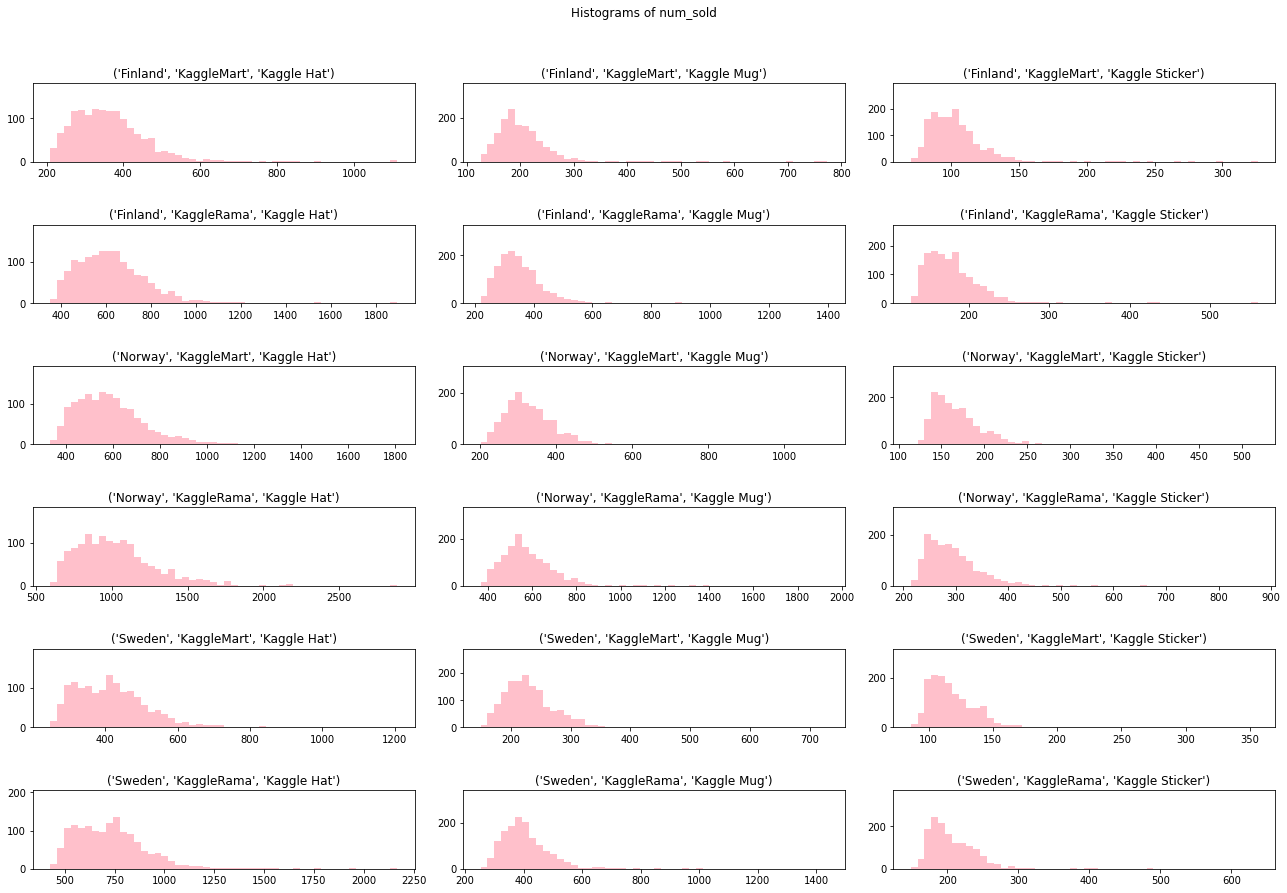

In [29]:
plt.figure(figsize=(18, 12))

for i, (combi, df) in enumerate(train_df.groupby(['country', 'store', 'product'])):
    ax = plt.subplot(6, 3, i+1, ymargin=0.5)
    ax.hist(df.num_sold, bins=50, color='pink')
    ax.set_title(combi)

plt.suptitle('Histograms of num_sold', y=1.03)
plt.tight_layout(h_pad=3.0)
plt.show()